# Avacado Project


Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

# Importing all necessary library

In [1]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

There are 18249 rows and 14 coumns in this dataset.

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

From above dataset Unnamed:0 is just a representation of index value so it could be dropped out from the dataset.

In [5]:
df.head()    # it will give you the top five values

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

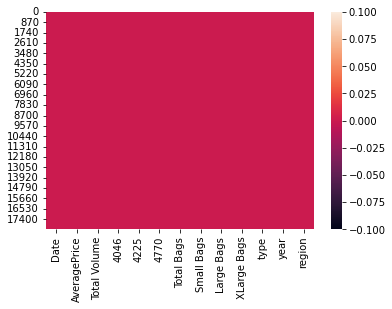

In [8]:
sns.heatmap(df.isnull()) 

Observation : From Above observation it can be seen that there is no null values in the given dataset.

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Observation : Here, I have added two more columns such as month and day so that i can analyse accordingly.

# EDA

Text(0.5, 1.0, 'Average Price')

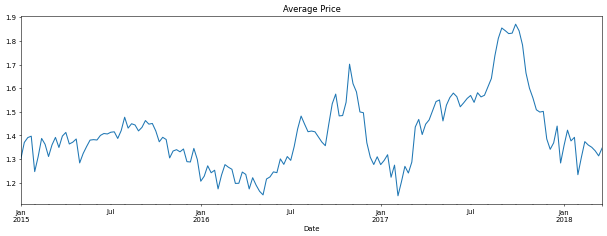

In [10]:
import matplotlib.pyplot as plt

byDate=df.groupby('Date').mean()
plt.figure(figsize=(15,5),dpi=50)
byDate['AveragePrice'].plot()
plt.title('Average Price')

Observation : here, plot shows the average price of avocado at various points of time



Text(0.5, 1.0, 'Average Price Per Month')

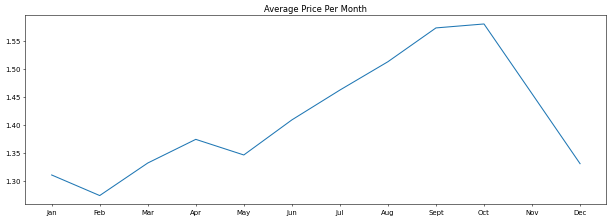

In [11]:
byMonth = df.groupby("Month").mean()
plt.figure(figsize=(15,5),dpi=50)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

Observation : Maximum average price can be seen in october month.

Text(0.5, 1.0, 'Average Price Per Day')

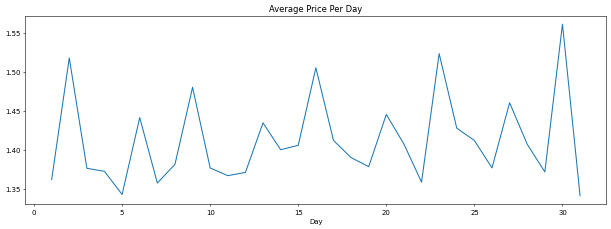

In [12]:
byDay = df.groupby("Day").mean()
plt.figure(figsize=(15,5),dpi=50)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

Observation : Price flactuates at a regular interval

Text(0.5, 1.0, 'Average Price According to Region')

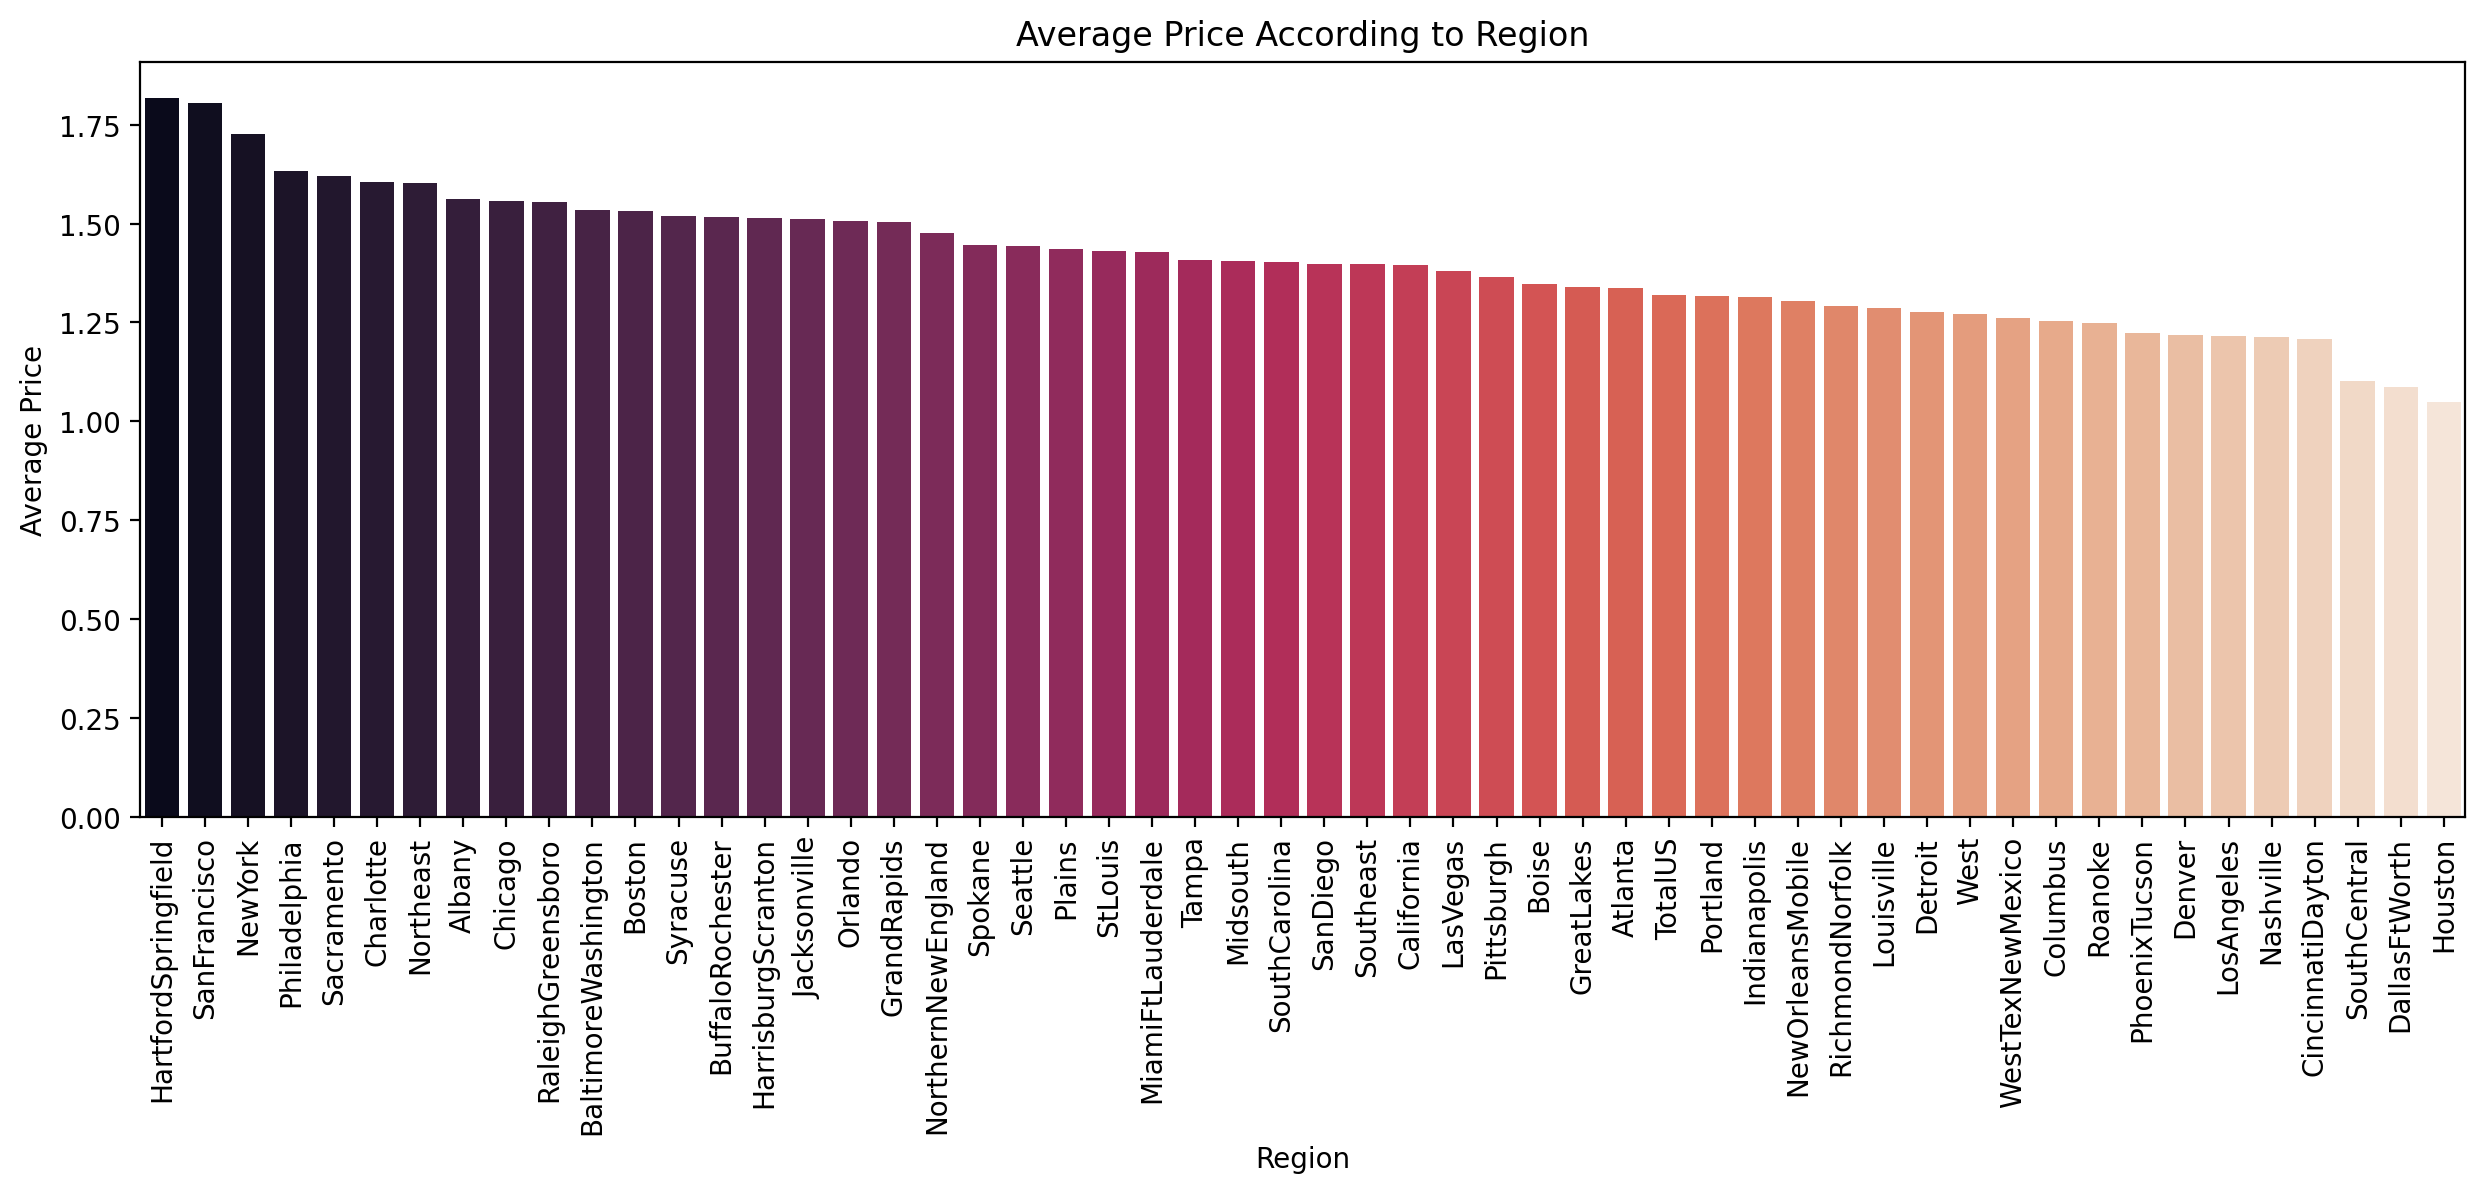

In [13]:
import seaborn as sns

byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

Observation : Highest average price can be seen in Hartford Springfield, SanFrancisco, NewYork.

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [15]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
varib = ['Date','type','region']
for i in varib:
    df[i]=label.fit_transform(df[i])

In [16]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


# To check distribution of skewness

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

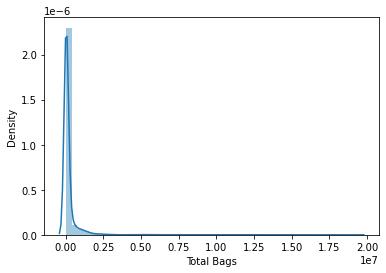

In [17]:
sns.distplot(df['Total Bags'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

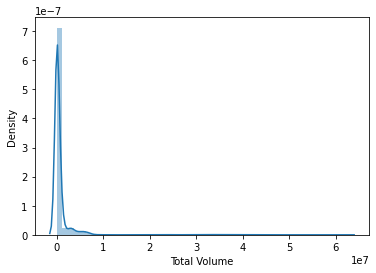

In [18]:
sns.distplot(df['Total Volume'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

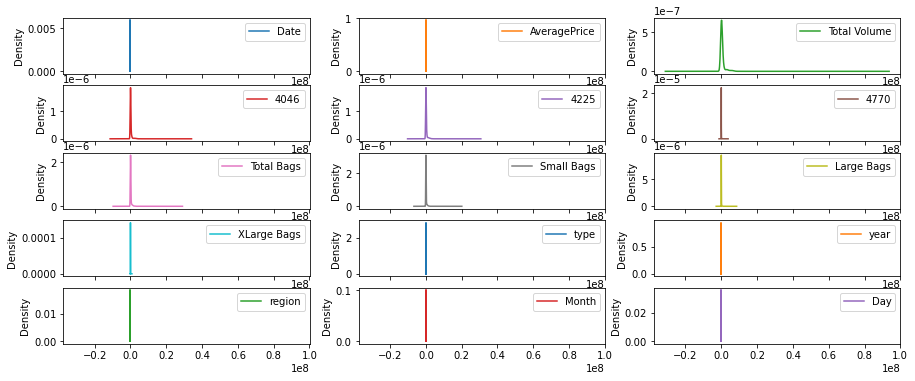

In [19]:
df.plot(kind='kde',subplots=True,layout=(5,3),figsize=(15,6))   # all column together

Observation : From above visulization, it can be seen that there is no skewness in given dataset.

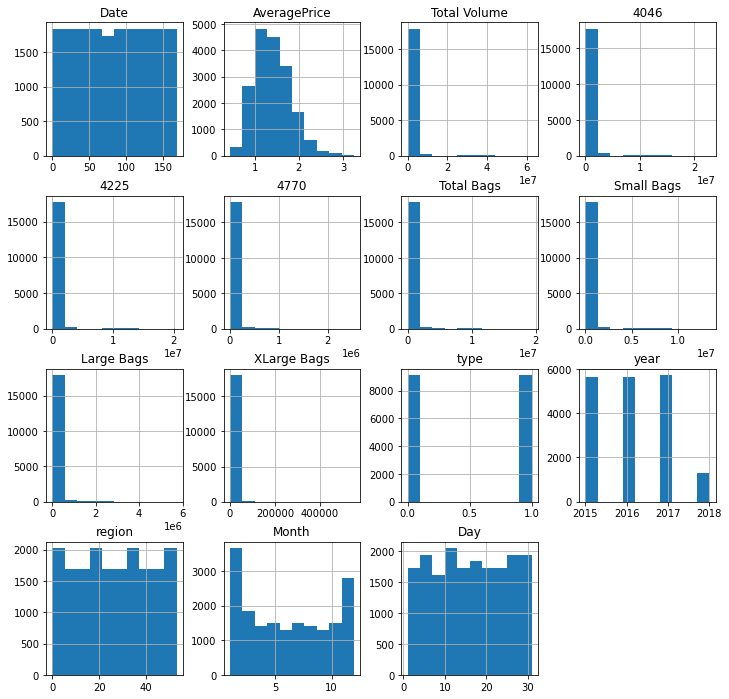

In [20]:
df.hist(figsize=(12,12));

Observation : From above histogram also it can be seen that there is no skewness.

In [21]:
dfcor=df.corr() 

In [22]:
dfcor

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101,0.137202,0.033477
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.009747
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.004988
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319


<AxesSubplot:>

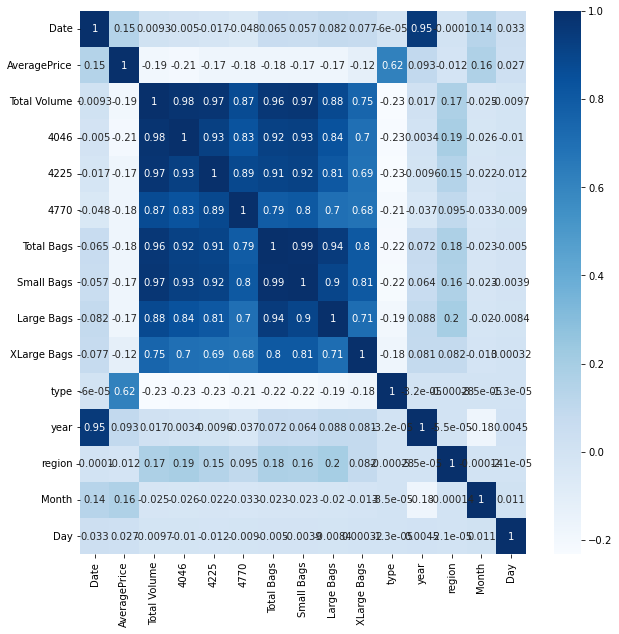

In [23]:
plt.figure(figsize=(10,10))           ### figsize=(10,10)   length,breadth
sns.heatmap(dfcor,cmap='Blues',annot=True)   ## cmap='Blues'  it will represent in blue color & annot=True means it will represent the correlated value in plot.

Observation : As we can from the heatmap above, all the Features are not correlated with the Average Price column, instead most of them are correlated with each other.

# Checking outliers

Date               AxesSubplot(0.125,0.749828;0.227941x0.130172)
AveragePrice    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Total Volume    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
4046               AxesSubplot(0.125,0.593621;0.227941x0.130172)
4225            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
4770            AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Total Bags         AxesSubplot(0.125,0.437414;0.227941x0.130172)
Small Bags      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Large Bags      AxesSubplot(0.672059,0.437414;0.227941x0.130172)
XLarge Bags        AxesSubplot(0.125,0.281207;0.227941x0.130172)
type            AxesSubplot(0.398529,0.281207;0.227941x0.130172)
year            AxesSubplot(0.672059,0.281207;0.227941x0.130172)
region                AxesSubplot(0.125,0.125;0.227941x0.130172)
Month              AxesSubplot(0.398529,0.125;0.227941x0.130172)
Day                AxesSubplot(0.672059,0.125;0.227941x0.130172)
dtype: object

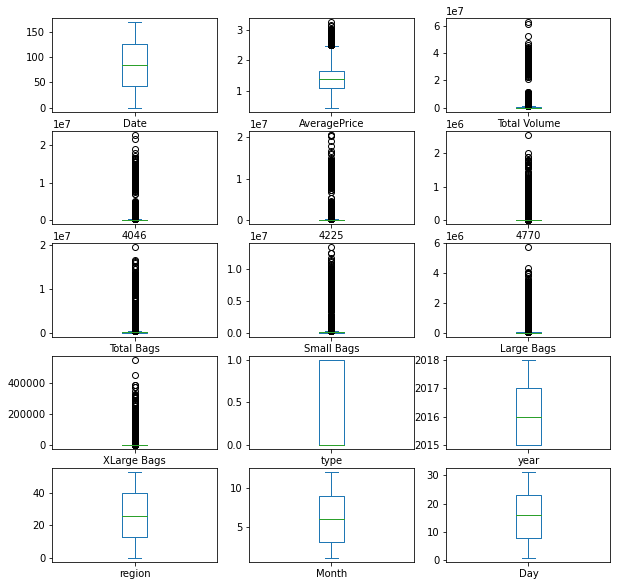

In [24]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,10))

# Removal of outliers

In [25]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.676360,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252,1.647632,1.291857
1,0.696857,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252,1.647632,0.494231
2,0.717355,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252,1.647632,0.303396
3,0.737853,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252,1.647632,1.101022
4,0.758350,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252,1.364669,1.519750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.578371,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811,1.181997,1.328915
18245,1.557874,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811,1.464959,1.405803
18246,1.537376,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811,1.464959,0.608177
18247,1.516879,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811,1.464959,0.189449


In [26]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 9, ..., 1, 1, 1], dtype=int64))


In [27]:
z.iloc[346,3]

3.199410614794124

In [28]:
df1=df[(z<3).all(axis=1)]

In [29]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


Date               AxesSubplot(0.125,0.749828;0.227941x0.130172)
AveragePrice    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Total Volume    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
4046               AxesSubplot(0.125,0.593621;0.227941x0.130172)
4225            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
4770            AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Total Bags         AxesSubplot(0.125,0.437414;0.227941x0.130172)
Small Bags      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Large Bags      AxesSubplot(0.672059,0.437414;0.227941x0.130172)
XLarge Bags        AxesSubplot(0.125,0.281207;0.227941x0.130172)
type            AxesSubplot(0.398529,0.281207;0.227941x0.130172)
year            AxesSubplot(0.672059,0.281207;0.227941x0.130172)
region                AxesSubplot(0.125,0.125;0.227941x0.130172)
Month              AxesSubplot(0.398529,0.125;0.227941x0.130172)
Day                AxesSubplot(0.672059,0.125;0.227941x0.130172)
dtype: object

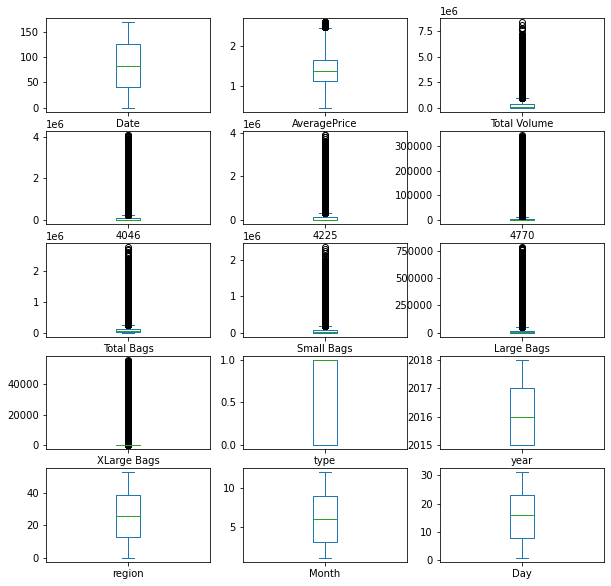

In [30]:
df1.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,10))

In [31]:
df1.drop('Date',axis=1,inplace=True)

In [32]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [33]:
x=df1.iloc[:,1:]
y=df1['AveragePrice']

In [34]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [35]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

# MultiColinearity with Variance Inflation fector

In [36]:
import statsmodels.api as sm 
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [38]:
calc_vif(x)

,variables,VIF FACTOR
0,Total Volume,4.977395e+08
1,4046,8.727666e+07
2,4225,7.504348e+07
3,4770,5.281429e+05
4,Total Bags,2.333471e+13
5,Small Bags,1.518921e+13
6,Large Bags,1.478286e+12
7,XLarge Bags,7.092953e+09
8,type,2.511619e+00
9,year,1.214483e+01


In [39]:
x=df1.drop(['XLarge Bags'],axis=1)

In [40]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,1,2018,53,1,14


# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [42]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is :- 1.0
At random state 0,the testing accuracy is :- 1.0


At random state 1,the training accuracy is :- 1.0
At random state 1,the testing accuracy is :- 1.0


At random state 2,the training accuracy is :- 1.0
At random state 2,the testing accuracy is :- 1.0


At random state 3,the training accuracy is :- 1.0
At random state 3,the testing accuracy is :- 1.0


At random state 4,the training accuracy is :- 1.0
At random state 4,the testing accuracy is :- 1.0


At random state 5,the training accuracy is :- 1.0
At random state 5,the testing accuracy is :- 1.0


At random state 6,the training accuracy is :- 1.0
At random state 6,the testing accuracy is :- 1.0


At random state 7,the training accuracy is :- 1.0
At random state 7,the testing accuracy is :- 1.0


At random state 8,the training accuracy is :- 1.0
At random state 8,the testing accuracy is :- 1.0


At random state 9,the training accuracy is :- 1.0
At random state 9,the testing accuracy is

In [43]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
pred_test=lr.predict(x_test)

In [47]:
print(r2_score(y_test,pred_test))

1.0


# Hyperparammeter tuning

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.linear_model import Lasso

parameters = {'alpha' : [.0001,.001,.01,.1,1,10],'random_state' : list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [50]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9999999332791447

# Conclusion : Lasso regression is the best for this dataset

In [51]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


# Classification part

# Train_Test_Split data

In [52]:
x=df1.iloc[:,:]
y=df1['region']

In [53]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [54]:
x=df1.drop(['region'],axis=1)

In [55]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14


In [56]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [57]:
df1.region.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
varib = ['region']
for i in varib:
    df1[i]=label.fit_transform(df1[i])

In [59]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=30)

In [62]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train) 
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))


Accuracy 15.859529878221467
[[ 0  0  0 ...  0  0  0]
 [ 0  4  0 ...  1  0  3]
 [ 1  0 20 ...  2  0  0]
 ...
 [ 0  0  0 ... 22  8  0]
 [ 0  0  0 ... 10 18  0]
 [ 0  0  2 ...  5  4  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.10      0.05      0.07        74
           2       0.21      0.29      0.24        68
           3       0.00      0.00      0.00        63
           4       0.15      0.09      0.11        79
           5       0.06      0.01      0.02        86
           6       0.17      0.39      0.23        56
           7       0.00      0.00      0.00        63
           8       0.77      0.45      0.57        75
           9       0.16      0.62      0.25        77
          10       0.00      0.00      0.00        72
          11       0.05      0.01      0.02        71
          12       0.25      0.36      0.29        85
          13       0.33      0.41      0.37        59
     

# DecisionTreeClassifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train) 
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.43047295383744
[[58  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  2]
 [ 0  0 62 ...  0  0  1]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 52  1]
 [ 0  1  1 ...  0  0 46]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        71
           1       0.72      0.65      0.68        74
           2       0.90      0.91      0.91        68
           3       0.84      0.90      0.87        63
           4       0.93      0.89      0.91        79
           5       0.82      0.77      0.80        86
           6       0.93      0.96      0.95        56
           7       0.86      0.76      0.81        63
           8       0.91      0.85      0.88        75
           9       0.84      0.79      0.81        77
          10       0.79      0.62      0.70        72
          11       0.87      0.82      0.84        71
          12       0.93      0.78      0.85        85
          13       0.66      0.69      0.68        59
      

# RandomForestRegressor

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train) 
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 90.51260266213538
[[68  0  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  0]
 [ 0  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  1  2 ...  0  0 54]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        71
           1       0.85      0.81      0.83        74
           2       0.93      0.99      0.96        68
           3       0.88      0.89      0.88        63
           4       0.97      0.97      0.97        79
           5       0.90      0.81      0.85        86
           6       0.97      1.00      0.98        56
           7       0.93      0.86      0.89        63
           8       1.00      0.96      0.98        75
           9       0.90      0.82      0.86        77
          10       0.87      0.82      0.84        72
          11       0.94      0.96      0.95        71
          12       0.96      0.93      0.95        85
          13       0.77      0.80      0.78        59
      

# Cross validation 

In [66]:
from sklearn.model_selection import cross_val_score
scr3=cross_val_score(rf,x,y,cv=5)
print("Cross Validation score of Random Forest Classifier : ",scr3.mean())

Cross Validation score of Random Forest Classifier :  0.6710132111937729


# Conclusion : RandomForestRegressor is the best classification model for this dataset

# Saving the model in pickle format

In [68]:
## PICKeling of file or serialization of a file

import pickle
filename='Avacado.pkl'
pickle.dump(rf,open(filename,'wb'))